---METRICS---
Accuracy_Score 0.49766666666666665
Recall_Score 0.48722316865417375
F1_Score 0.4315352697095436
Precision_Score 0.38727149627623564


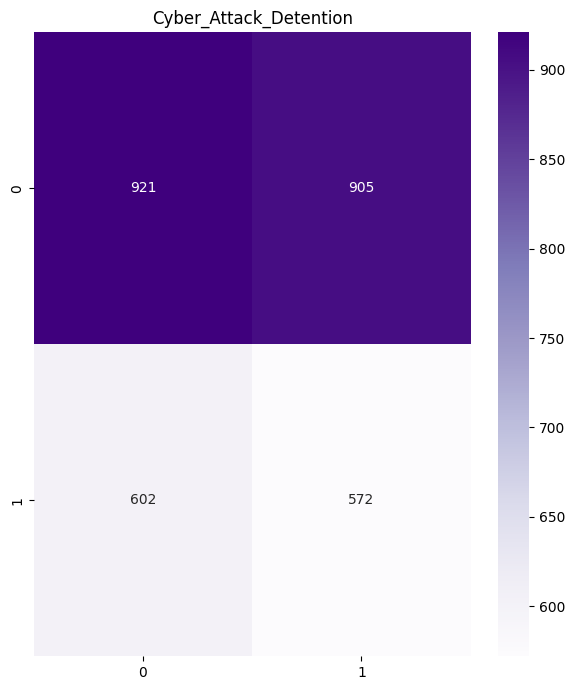

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler

df=pd.read_csv("cyber_attack_detection_10000.csv")
#print(df.head())

le=LabelEncoder()
el=LabelEncoder()
ab=LabelEncoder()
df["Malware_Signature_Detected"]=le.fit_transform(df["Malware_Signature_Detected"])
df["Source_Port"]=el.fit_transform(df["Source_Port"])
df["Protocol"]=ab.fit_transform(df["Protocol"])

x=df[["Source_Port","Destination_Port","Protocol","Packet_Size","Connection_Duration_ms","Failed_Login_Attempts","Malware_Signature_Detected"]]
y=df["Is_Attack"]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)


x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

model=LogisticRegression(max_iter=3000,class_weight="balanced")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("---METRICS---")

print("Accuracy_Score",accuracy_score(y_test,y_pred))
print("Recall_Score",recall_score(y_test,y_pred))
print("F1_Score",f1_score(y_test,y_pred))
print("Precision_Score",precision_score(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)

plt.figure(figsize=(6,7))
plt.xlabel("Actual value")
plt.ylabel("Predicted value")
plt.title("Cyber_Attack_Detention")
sns.heatmap(cm,annot=True,fmt="d",cmap="Purples")
plt.tight_layout()
plt.show()